# Motivating the coprecessing model

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from pwca import *
from glob import glob
import lalsimulation as lalsim
from nrutils.analyze.match import match as match_object

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from Welsh Puck (aka pwca).
(pwca.core)>> Catalog of calibration runs stored to "pwca.pwca_catalog"
(pwca.core)>> Metadata dictionary for calibration runs stored to "pwca.metadata_dict"
(pwca.core)>> Metadata dictionary for Ed's catalog paper stored to "pwca.catalog_paper_metadata"


In [2]:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath} \
                     \usepackage{amssymb}')

In [3]:

# # PLOT ALL AS PNG

# #
# package_dir = parent( pwca.__path__[0] )
# datadir = package_dir + 'data/version2/'
# files = glob( datadir+'q*.txt' )

# close('all')

# #
# fref = 20

# #
# q_list = []
# for a in pwca_catalog:
#     q_list.append( int( round(a.m1/a.m2,2) ) )
# mask = argsort(q_list)
# pwca_catalog = array(pwca_catalog)[mask]

# match_list = []
# mod_phenomd_match_list = []
# kk = 0
# for a in pwca_catalog:
    
#     #
#     if True: 
        
#         #
#         print '>> ',a.simname

#         #
#         file_ = [ k for k in files if a.simname in k ][0]

#         #
#         Msol = 100.0
#         Dmpc = 1000.0
#         #
#         theta = 0
#         phi   = 0
#         #
#         fmin = 30.0
#         fmax = 300.0

#         # Load data for this case
#         raw_data = loadtxt(file_)
#         f,amp_td,amp_fd,dphi_td,dphi_fd,phi_td,phi_fd = raw_data.T
#         # NOTE that the data used here must be consistent with the data used for calibration
#         hcode_ = amp_fd * exp( 1j * phi_fd ) * sYlm(-2,2,2,theta,phi)
#         hcode = array([f,hcode_*0.5,hcode_*0.5*1j]).T

#         # Generate NR FD waveform array
#         # ------------------------------------------------ #
#         mask = f>0
#         f     = f[mask]
#         hcode = hcode[mask,:]
#         hphys = physhf(hcode,Msol,Dmpc)

#         # Generate MODEL FD waveform array
#         # ------------------------------------------------ #

#         if linalg.norm(a.X1)<1e-3:
#             m1,m2 = a.m2,a.m1
#             X1,X2 = a.X2,a.X1
#             a.m1,a.m2 = m1,m2
#             a.X1,a.X2 = X1,X2

#         # External 2-spin mapping
#         chi_p    = calc_chi_p(a.m1,a.X1,a.m2,a.X2,a.L)
#         a1,model_theta = calc_effective_a1_theta( a.m1, a.m2, a.X1, a.X2, a.L )
#         # Find index location of metadata for simname 
#         k = [ z.split('.')[0] for z in pwca.metadata_dict['simname'] ].index(a.simname.split('.')[0])
#         model_theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2 = pwca.metadata_dict['array_data'][k]

#         # Generate a coprecessing waveform as 1D array (NEW INPUT STRUCTURE)
#         hmodel = generate_pwca_waveform_helper( f, model_theta, eta, a1, chi1,chi2, chi_p, fref=fref ) 
#         dphi_model = pwca_dphi_helper( f, model_theta, eta, a1, chi1,chi2, chi_p, fref=fref ) 

#         #
#         mod_phenomd = generate_modified_phenomd(f, a.m1, a.m2, a.X1, a.X2, a.L)
#         mod_phenomd_phi = unwrap(angle( mod_phenomd ))
        
#         #
#         mod_phenomd_dphi = spline_diff( f, mod_phenomd_phi )

#         # --- #
        
#         #
#         figure( figsize=1.2*figaspect(0.45) )

#         # plot data for comparison 
#         plot( f, amp_fd[mask],label='NR',lw=4, color='k', ls='--', alpha=0.25 )
#         plot( f, abs(hmodel),label='\sc{PhenomPNR}',lw=1, color='k',ls='-' )
#         plot( f, abs(mod_phenomd),label='\sc{PhenomPv3}',lw=1, ls='--', color='k' )
#         xscale('log')
#         yscale('log')

#         #
#         ref_data = amp_fd[mask]
#         xlim(0.04,0.11)
#         ylim( lim( ref_data[ (f>min(xlim())) & (f<max(xlim())) ] ) )
        
        
#         #
#         xlabel('$Mf$')
#         ylabel(r'$|{h}^{\rm{QA}}_{22}|$')
        
#         #
#         legend()
        
#         #
#         savefig('/Users/book/KOALA/precession-paper-2019/results/11-cpmodel-motivational-plots/all_png/amp_%s.png'%a.simname,pad_inches=.1,bbox_inches='tight')

#         # --- #
        
#         #
#         figure( figsize=1.2*figaspect(0.45) )
#         fmin,fmax = 0.04,0.11
#         plot_mask = (f>fmin) & (f<fmax) 
        
#         #
#         nr  = dphi_fd[mask]
#         dcp = dphi_model
#         mod = mod_phenomd_dphi
        
#         #
#         center = lambda X: X - mean(X[plot_mask])
#         nr,dcp,mod = ( center(k) for k in [nr,dcp,mod] )

#         # plot data for comparison 
#         plot( f, nr ,label='NR',lw=4, color='k', ls='--', alpha=0.25 )
#         plot( f, dcp,label='\sc{PhenomPNR}',lw=1, color='k',ls='-' )
#         plot( f, mod,label='\sc{PhenomPv3}',lw=1, ls='--', color='k' )
#         xscale('log')
#         #yscale('log')

#         #
#         ref_data = mod
#         xlim(fmin,fmax)
#         ylim( lim( ref_data[ plot_mask ] ) + array([-10,0]) )
        
        
#         #
#         xlabel('$Mf$')
#         ylabel(r'$\frac{d}{df} \arg( {h}^{\rm{QA}}_{22})$')
        
#         #
#         legend()
        
#         #
#         savefig('/Users/book/KOALA/precession-paper-2019/results/11-cpmodel-motivational-plots/all_png/dphi_%s.png'%a.simname,pad_inches=.1,bbox_inches='tight')
        
#         #
#         show()


    

In [41]:
def plot_amp_pha_comparison(key,fmin=0.04,fmax=0.11,save=False,fmax_=None,xs='linear',ys='linear',legend_loc=1):
    
    #
    from pwca import pwca_catalog
    from matplotlib import rc
    rc('text', usetex=True)
    rc('text.latex', preamble=r'\usepackage{amsmath} \
                         \usepackage{amssymb}')
    
    #
    if fmax_==None:
        fmax_=fmax

    #
    package_dir = parent( pwca.__path__[0] )
    datadir = package_dir + 'data/version2/'
    files = glob( datadir+'q*.txt' )

    close('all')

    #
    fref = 20

    #
    q_list = []
    for a in pwca_catalog:
        q_list.append( int( round(a.m1/a.m2,2) ) )
    mask = argsort(q_list)
    pwca_catalog = array(pwca_catalog)[mask]

    match_list = []
    mod_phenomd_match_list = []
    kk = 0
    for a in pwca_catalog:

        # 
        if key in a.simname:

            #
            print '>> ',a.simname

            #
            file_ = [ k for k in files if a.simname in k ][0]

            # Load data for this case
            raw_data = loadtxt(file_)
            f,amp_td,amp_fd,dphi_td,dphi_fd,phi_td,phi_fd = raw_data.T
            # NOTE that the data used here must be consistent with the data used for calibration
            hcode_ = amp_fd * exp( 1j * phi_fd ) #* sYlm(-2,2,2,0,0)
            hcode = array([f,hcode_*0.5,hcode_*0.5*1j]).T

            # Generate NR FD waveform array
            # ------------------------------------------------ #
            mask = f>0
            f     = f[mask]
            hcode = hcode[mask,:]

            # Generate MODEL FD waveform array
            # ------------------------------------------------ #

            if linalg.norm(a.X1)<1e-3:
                m1,m2 = a.m2,a.m1
                X1,X2 = a.X2,a.X1
                a.m1,a.m2 = m1,m2
                a.X1,a.X2 = X1,X2

            # External 2-spin mapping
            chi_p    = calc_chi_p(a.m1,a.X1,a.m2,a.X2,a.L)
            a1,model_theta = calc_effective_a1_theta( a.m1, a.m2, a.X1, a.X2, a.L )
            # Find index location of metadata for simname 
            k = [ z.split('.')[0] for z in pwca.metadata_dict['simname'] ].index(a.simname.split('.')[0])
            model_theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2 = pwca.metadata_dict['array_data'][k]

            # Generate a coprecessing waveform as 1D array (NEW INPUT STRUCTURE)
            hmodel = generate_pwca_waveform_helper( f, model_theta, eta, a1, chi1,chi2, chi_p, fref=fref ) 
            dphi_model = pwca_dphi_helper( f, model_theta, eta, a1, chi1,chi2, chi_p, fref=fref ) 

            # Compute ringdown frequencies for DCP
            cf_amp,cf_pha = pwca_rdcf( model_theta, eta, a1, chi1, chi2, chi_p, alpha5_scale=not True )
            d_cf_amp,d_cf_pha = pwca_rdcf( model_theta, eta, a1, chi1, chi2, chi_p, mod=True, alpha5_scale=not True )
            cf_leaver = leaver(-a.xf,2,2,Mf=a.mf)[0]/(2*pi)
            print(a.xf)

            #
            mod_phenomd = generate_modified_phenomd(f, a.m1, a.m2, a.X1, a.X2, a.L)
            mod_phenomd_phi = unwrap(angle( mod_phenomd ))

            #
            mod_phenomd_dphi = spline_diff( f, mod_phenomd_phi )

            # --- #

            #
            figure( figsize=1.2*figaspect(0.45) )

            # plot data for comparison 
            plot( f, amp_fd[mask],label='NR',lw=4, color='k', ls='--', alpha=0.25 )
            plot( f, abs(hmodel),label='\sc{PhenomDCP}',lw=1, color='k',ls='-' )
            plot( f, abs(mod_phenomd),label='\sc{PhenomPv3}',lw=1, ls='--', color='k' )
            xscale(xs)
            yscale(ys)

            #
            ref_data = amp_fd[mask]
            #fmin,fmax = 0.045,0.09
            xlim(fmin,fmax)
            ylim( lim( ref_data[ (f>min(xlim())) & (f<max(xlim())) ] ) )


            #
            xlabel('$Mf$')
            #ylabel(r'$|{h}^{\rm{QA}}_{22}|$')
            ylabel(r'$A_{22}$')

            #
            vlw = 4
            vla = 0.125
            #axvline( cf_amp.real, color='k', ls='-', alpha=vla, lw=vlw, zorder=-20 )
            #axvline( d_cf_amp.real, color='k', ls=':', alpha=vla, lw=vlw, zorder=-20 )

            #
            legend(loc=legend_loc)

            #
            if save: savefig('/Users/book/KOALA/precession-paper-2019/results/11-cpmodel-motivational-plots/amp_%s_v2.pdf'%a.simname,pad_inches=.1,bbox_inches='tight')

            # --- #

            #
            figure( figsize=1.2*figaspect(0.45) )
            plot_mask = (f>fmin) & (f<fmax) 
            # Dine mask for aligment of phase derivaive
            fmin_,fmax_ = fmin,fmax_
            aligment_mask = (f>fmin_) & (f<fmax_) 

            #
            nr  = dphi_fd[mask]
            dcp = dphi_model
            mod = mod_phenomd_dphi

            #
            #center = lambda X: X - mean(X[aligment_mask])
            center = lambda X: X - min(smooth(X[plot_mask]).answer)
            nr,dcp,mod = ( center(k) for k in [nr,dcp,mod] )

            # plot data for comparison 
            plot( f, nr ,label='NR',lw=4, color='k', ls='--', alpha=0.25 )
            plot( f, dcp,label='\sc{PhenomDCP}',lw=1, color='k',ls='-' )
            plot( f, mod,label='\sc{PhenomPv3}',lw=1, ls='--', color='k' )
            xscale(xs)
            #yscale(ys)

            #
            ref_data = nr
            xlim(fmin,fmax)
            ylim( lim( ref_data[ plot_mask ] ) + array([-10,0]) )


            #
            xlabel('$Mf$')
            ylabel(r'$\frac{d}{df}\phi_{22}$')
            #ylabel(r'$\frac{1}{M}\frac{d}{df} \arg( {h}^{\rm{QA}}_{22})$')

            #
            legend(loc=legend_loc)

            #
            #axvline( cf_pha.real, color='k', ls='-', alpha=vla, lw=vlw, zorder=-20 )
            #axvline( d_cf_pha.real, color='k', ls=':', alpha=vla, lw=vlw, zorder=-20 )
            #axvline( cf_leaver.real, color='r', ls='-', alpha=0.5, lw=1, zorder=-20 )

            #
            if save: savefig('/Users/book/KOALA/precession-paper-2019/results/11-cpmodel-motivational-plots/dphi_%s_v2.pdf'%a.simname,pad_inches=.1,bbox_inches='tight')

            #
            show()

>>  q4a08t150_T_96_360
0.27144137126543794


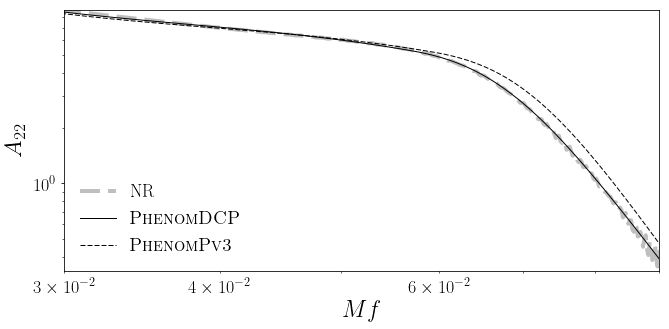

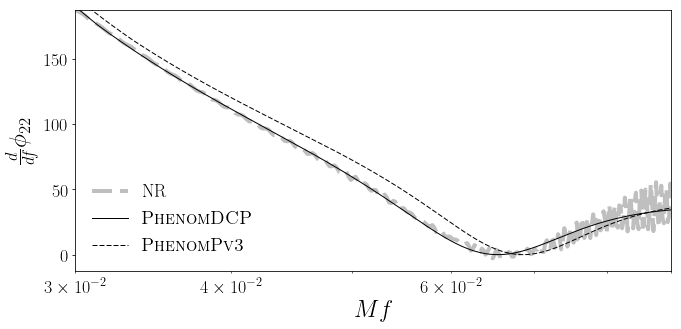

In [45]:
key = 'q4a08t150'
plot_amp_pha_comparison(key,fmin=0.03,fmax=0.09,save=not False,fmax_=0.1,ys='log',xs='log',legend_loc=3)

>>  q4a08t60dPm3dRm250_T_96_384
0.7997191759544718


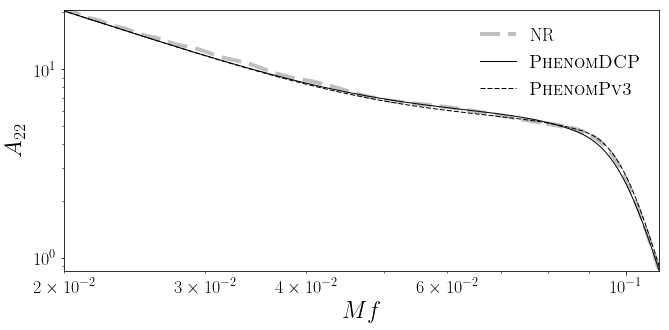

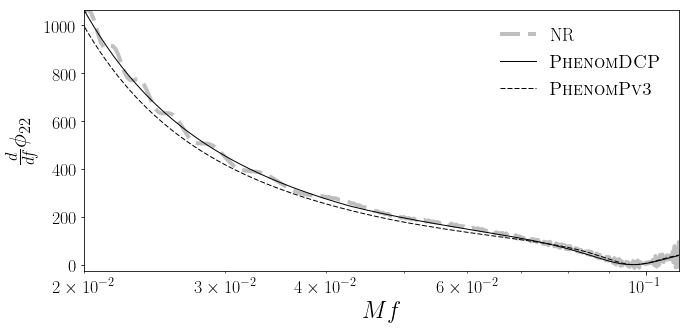

In [43]:
key = 'q4a08t60'# 'q8a08t90'
plot_amp_pha_comparison(key,fmin=0.02,fmax=0.11,save=not False,fmax_=0.1,ys='log',xs='log',legend_loc=1)

>>  q2_a10_a28_ph0_th150
0.431312270287046


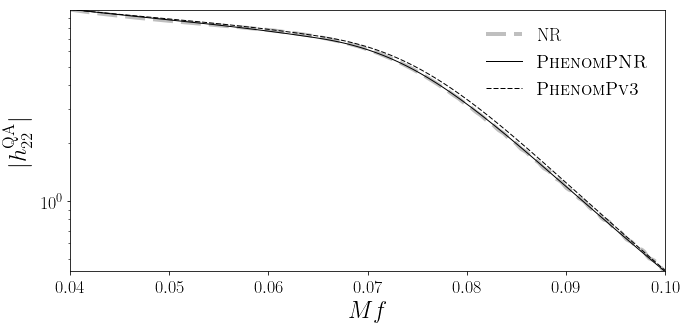

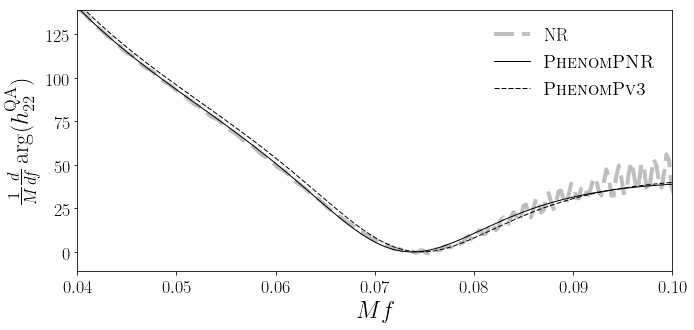

In [23]:
key = 'q2_a10_a28_ph0_th150'# 'q8a08t90'
plot_amp_pha_comparison(key,fmin=0.04,fmax=0.1,save=not False,fmax_=0.075,ys='log',legend_loc=1)

>>  q4a08t120dP1_T_96_360
0.5057478757903249


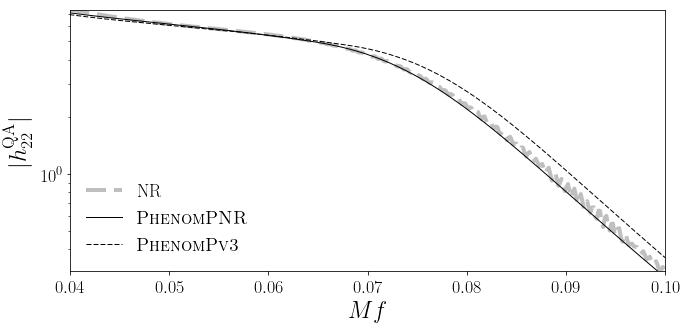

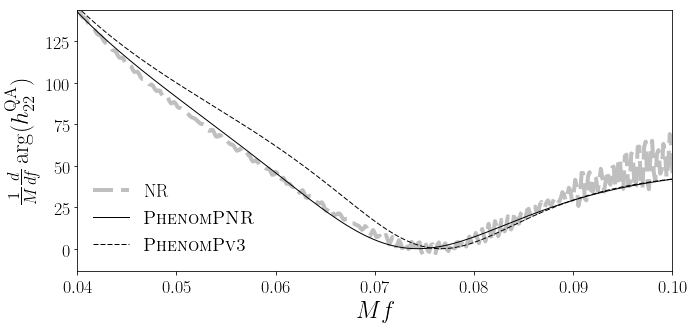

In [24]:
key = 'q4a08t120'# 'q8a08t90'
plot_amp_pha_comparison(key,fmin=0.04,fmax=0.1,save=not False,fmax_=0.075,ys='log',legend_loc=3)

>>  q8a08t120dP2_r03_T_96_360
-0.5483681244279004


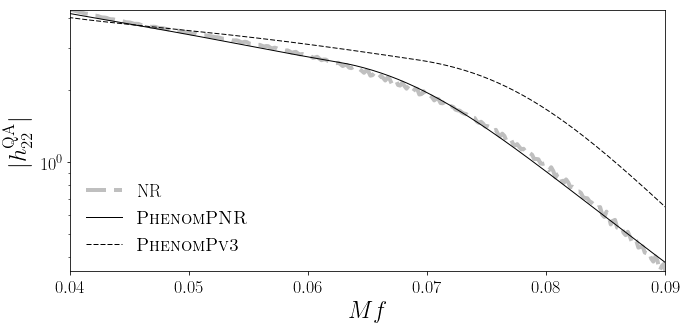

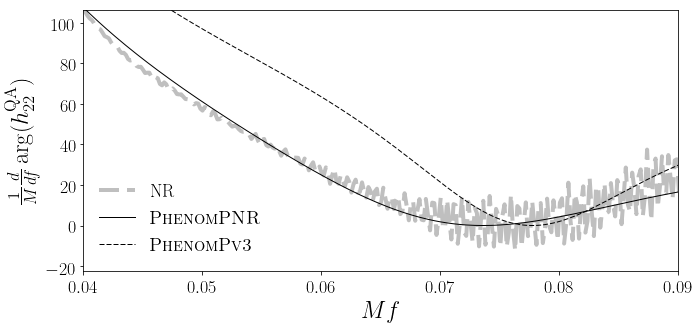

In [25]:
key = 'q8a08t120'# 'q8a08t90'
plot_amp_pha_comparison(key,fmin=0.04,fmax=0.09,save=not False,fmax_=0.075,ys='log',legend_loc=3)

>>  q8a08t150dP2_T_120_480
0.37090331355612977


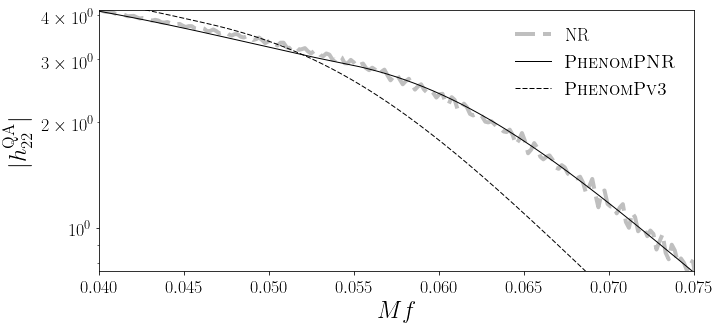

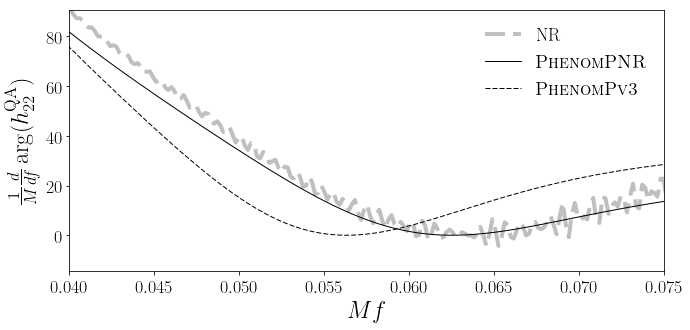

In [26]:
key = 'q8a08t150'# 'q8a08t90'
plot_amp_pha_comparison(key,fmin=0.04,fmax=0.075,save=False,fmax_=0.075,ys='log')

In [97]:
import pickle

In [98]:
pwca_fits_path = '/Users/book/KOALA/puck/ll/data/version2/parameter_space_fits.pickle'
pwca_fits = pickle.load( open( pwca_fits_path, "rb" ) )

In [101]:
print pwca_fits.keys()

['mu4', 'model_domain', 'mu2', 'nu6', 'nu4', 'nu5', 'zeta2', 'model_domain_header']


In [106]:
pwca_fits['mu4'].domain.shape

(40, 4)

In [115]:
?FinalSpin0815

Signature: FinalSpin0815(eta, chi1, chi2)
Docstring: Wrapper function for FinalSpin0815_s.
File:      ~/KOALA/puck/ll/pwca/d.py
Type:      function


In [134]:
#
def get_mvfo_slice(mvfo,eta_ref,a1_ref,apply_alpha5=False):
    
    #
    from phenom.utils.remnant import fring,fdamp
    from positive import eta2m1m2
    from pwca import alpha5 as alpha5_fit
    
    #
    u, eta, delta, a1 = mvfo.domain.T
    m1,m2 = eta2m1m2(eta)
    
    #
    mask = (abs(eta-eta_ref)<1e-2) & (abs(a1-a1_ref)<1e-2)
    
    #
    theta_radians = arccos( u )
    chi_eff, chi_p = parama_party( eta,theta_radians,a1 )
    chi1 = chi_eff/m1
    chi2 = 0*chi1
    
    # PhenomD fring and fdamp
    afd = array( [ FinalSpin0815(eta[k],chi1[k],chi2[k]) for k in range(len(u)) ] )
    fr  = array([fring( eta[k], chi1[k], chi2[k], afd[k]) for k in range(len(u)) ])
    fd  = array([fdamp( eta[k], chi1[k], chi2[k], afd[k]) for k in range(len(u)) ])
    
    #
    model_var = mvfo.range[mask]
    
    #
    calibration_f0 = fr[mask] + chi_p[mask] * model_var
    select_domain = theta_radians[mask]
    
    #
    if apply_alpha5:
        alpha5 = alpha5_fit(eta,chi_eff)
        calibration_f0 *= alpha5[mask]
    
    #
    return select_domain,calibration_f0
    
#
get_mvfo_slice(pwca_fits['mu4'],q2eta(8),0.8)

(array([0.52892565, 1.58161606, 2.10334595, 1.05659401, 2.62298201]),
 array([0.10156446, 0.08041351, 0.06629609, 0.09471423, 0.05886321]))

(notebook)>> 0.4244903061040223


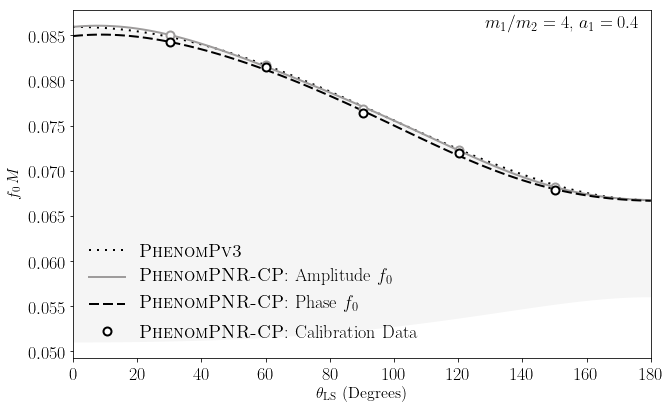

In [383]:

#
q,aa = 4,4
key = 'q%ia0%i'%(q,aa)
a = scsearch(catalog=pwca_catalog,keyword=key+'t120')[0]
k = [ z.split('.')[0] for z in pwca.metadata_dict['simname'] ].index(a.simname.split('.')[0])
model_theta_,m1_,m2_,eta_,delta_,chi_eff_,chi_p_,chi1_,chi2_,a1_,a2_ = pwca.metadata_dict['array_data'][k]

alert(a.xf)

# Compute ringdown frequencies for DCP
theta_range = linspace(0,pi,101)
cfa_list,cfp_list = [],[]
mod_cf_list = []
mod_cf_fixed_list = []
mod_cf_retro_list = []
ce = []
pwca_cf = []
pwca_cf2 = []

#
for th in theta_range:
    
    #
    chi_eff, chi_p__ = parama_party( eta_,th,a1_ )
    
    #
    cfa_,cfp_ = pwca_rdcf( th, eta_, a1_, chi_eff/m1_, 0, chi_p__, alpha5_scale=True )
    cfa_list.append(cfa_),cfp_list.append(cfp_)
    
    #
    mod_cf_,_ = pwca_rdcf( th, eta_, a1_, chi_eff/m1_, 0, chi_p__, alpha5_scale=True, mod=True )
    mod_cf_list.append(mod_cf_)
    
    #
    mod_cf_fixed,_ = pwca_rdcf( th, eta_, a1_, chi_eff/m1_, 0, chi_p__, alpha5_scale=True, mod=True, fixd=True )
    mod_cf_fixed_list.append(mod_cf_fixed)
    
    #
    mod_cf_retro,_ = pwca_rdcf( th, eta_, a1_, chi_eff/m1_, 0, chi_p__, alpha5_scale=True, mod=True, fixd=True,__retro__=True )
    mod_cf_retro_list.append(mod_cf_retro)
    
    #
    Mf_,af2_,af3_,MfNP_,afNP_ = pwca_remnant(th, eta_, a1_)
    pwca_cf_ = leaver(af3_,2,2,Mf=Mf_)[0]/(2*pi)
    pwca_cf.append(pwca_cf_)
    pwca_cf2_ = leaver(-af3_,2,2,Mf=Mf_)[0]/(2*pi)
    pwca_cf2.append(pwca_cf2_)
    
    #
    ce.append(chi_eff/m1_)
    
    # #
    # cfa_,cfp_ = pwca_rdcf( th, eta_, a1_, chi1_, chi2_, chi_p__, alpha5_scale=True )
    # cfa_list.append(cfa_),cfp_list.append(cfp_)
    # 
    # #
    # mod_cf_,_ = pwca_rdcf( th, eta_, a1_, chi1_, chi2_, chi_p__, alpha5_scale=True, mod=True )
    # mod_cf_list.append(mod_cf_)
    
#
cfa,cfp,mod_cf,mod_cf_fixed,pwca_cf,pwca_cf2,mod_cf_retro = [ array(k) for k in (cfa_list,cfp_list,mod_cf_list,mod_cf_fixed_list,pwca_cf,pwca_cf2,mod_cf_retro_list) ]

#
figure( figsize = 1.6*figaspect(0.618) )
domain = 180*theta_range/pi


plot( domain, mod_cf.real, color='k', ls=':', label=r'{\sc{PhenomPv3}}',lw=2)

#
plot( domain, cfa.real, color='#9e9c9c', ls='-', label=r'{\sc{PhenomPNR-CP}}: Amplitude $f_{0}$',lw=2 )
plot( domain, cfp.real, color='k', ls='--', label=r'{\sc{PhenomPNR-CP}}: Phase $f_{0}$',lw=2 )


# Plot Calibration points for amplitude quantity
th_rad,f0 = get_mvfo_slice(pwca_fits['mu4'],q2eta(q),float(aa)/10)
th_deg = th_rad * 180/pi
plot( th_deg,f0, ls='none', marker='o', color='#9e9c9c', mfc='w',mew=2,ms=8 )


# Plot Calibration points for phase quantity
th_rad,f0amp = get_mvfo_slice(pwca_fits['nu5'],q2eta(q),float(aa)/10,apply_alpha5=True)
th_deg = th_rad * 180/pi
plot( th_deg,f0amp, ls='none', marker='o', color='k', mfc='w',mew=2,ms=8, label='{\sc{PhenomPNR-CP}}: Calibration Data' )



#plot( domain, mod_cf_retro.real, color='k', ls='-.', lw=1 )

# u = sYlm(-2,2,2,theta_range,0)
# u = (u/u[0])**0.5
# plot( domain, mod_cf_retro.real*sqrt(1-u**2) + mod_cf_fixed.real*u, color='r', ls='-' )
# plot( domain, pwca_cf.real, color='r', ls='-', label=r'\sc{PWCA-Remnants}',lw=2)

#
xlim(lim(domain))
xlabel(r'$\theta_{\mathrm{LS}}$ (Degrees)')
ylabel(r'$f_{0} \, M$')
#xlim(110,130)
legend(loc=3)

# title('forcing positive Pv3 spin: '+a.simname.split('t')[0])
# title(a.simname.split('t')[0])



#
fill_between( domain, mod_cf_retro.real,mod_cf_fixed.real, color='k',alpha=0.04,zorder=-20,linewidth=0 )

text_pad_frac = 0.02
#text( min(xlim())+text_pad_frac*diff(xlim()), min(ylim())+text_pad_frac*diff(ylim()), a.simname.split('t')[0], size=18, va='bottom', ha='left' )
#text( max(xlim())-text_pad_frac*diff(xlim()), max(ylim())-text_pad_frac*diff(ylim()), a.simname.split('t')[0], size=18, va='top', ha='right' )
text( max(xlim())-text_pad_frac*diff(xlim()), max(ylim())-text_pad_frac*diff(ylim()), r'$m_1/m_2=%i$, $a_1=0.%i$'%(q,aa), size=18, va='top', ha='right' )

savefig('/Users/book/KOALA/precession-paper-2019/results/14-motivational-plots/frd_%s.pdf'%a.simname.split('t')[0],pad_inches=0.1,bbox_inches='tight')

In [371]:
xi_vecs = [ a.J/(a.m1+a.m2)**2 for a in pwca_catalog] 
li_vecs = [ a.L for a in pwca_catalog] 
si_vecs = [ a.S for a in pwca_catalog] 
xf_vecs = [ a.Xf for a in pwca_catalog] 
uls = [ dot(a.L,a.S)/( linalg.norm(a.L) * linalg.norm(a.S) ) for a in pwca_catalog] 
th = arccos( array(uls) )
u_xixf = [ dot(xi,xf)/( linalg.norm(xi) * linalg.norm(xf) ) for (xi,xf) in zip(xi_vecs,xf_vecs) ]
u_lixf = [ dot(li,xf)/( linalg.norm(li) * linalg.norm(xf) ) for (li,xf) in zip(li_vecs,xf_vecs) ]
u_sixf = [ dot(si,xf)/( linalg.norm(si) * linalg.norm(xf) ) for (si,xf) in zip(si_vecs,xf_vecs) ]
mask = array([ 'q8a08' in a.simname for a in pwca_catalog ])

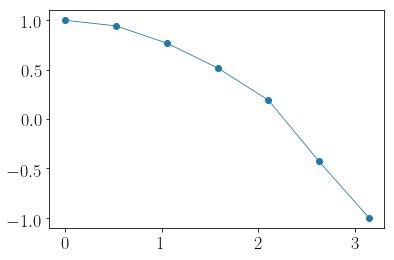

In [372]:
cap = argsort(th[mask])
plot( [0]+list(th[mask][cap])+[pi], array([1]+list(array(u_lixf)[mask][cap])+[-1]), '-o' )

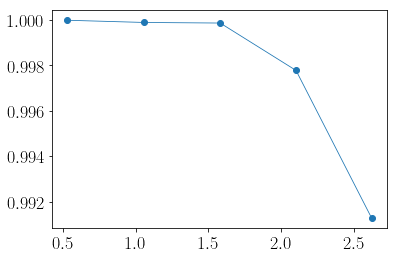

In [374]:
cap = argsort(th[mask])
plot( th[mask][cap], array(u_xixf)[mask][cap], '-o' )
#plot( th[mask][cap], array(u_sixf)[mask][cap], '-o' )

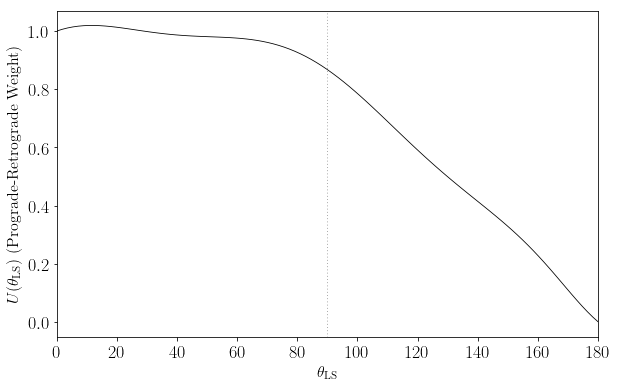

In [255]:
#
figure( figsize=1.5*figaspect(0.618) )

U = (cfa.real-mod_cf_retro.real)/(mod_cf_fixed.real-mod_cf_retro.real)
# knots,rom = romline(domain,U,2,__force_N__=True)
# print domain[knots]

plot( domain, U, color='k'  )
# plot( domain, 1-U, color='k', ls='--'  )
# plot( domain, rom(domain) )

axvline(90,ls=':',color='k',alpha=0.5)

xlim(lim(domain))
xlabel(r'$\theta_{\mathrm{LS}}$')
ylabel(r'$U(\theta_{\mathrm{LS}})$~(Prograde-Retrograde Weight)')

text_pad_frac = 0.02
# text( min(xlim())+text_pad_frac*diff(xlim()), min(ylim())+text_pad_frac*diff(ylim()), a.simname.split('t')[0], size=18, va='bottom', ha='left' );

In [234]:
%%latex
\begin{align}
    f_0 \; &= \; U \, f_{\mathrm{RD}}^{(\mathrm{Pro})} \, + \, (1-U) \, f_{\mathrm{RD}}^{(\mathrm{Ret})}
    \\
    U \; &= \;  (f_0 - f_{\mathrm{RD}}^{(\mathrm{Ret})})/( f_{\mathrm{RD}}^{(\mathrm{Pro})}-f_{\mathrm{RD}}^{(\mathrm{Ret})} )
\end{align}

<IPython.core.display.Latex object>

In [179]:
?sYlm

Signature: sYlm(s, l, m, theta, phi, return_mesh=False, leaver=False)
Docstring: <no docstring>
File:      ~/JOKI/Libs/KOALA/positive_dev/positive/maths.py
Type:      function


In [9]:
print a.xf

0.4244903061040223


(notebook)>> 0.37090331355612977


Text(3.6,0.993259,'q8a08')

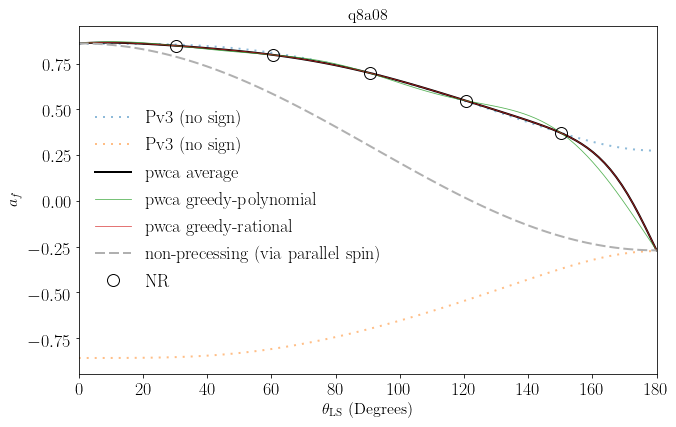

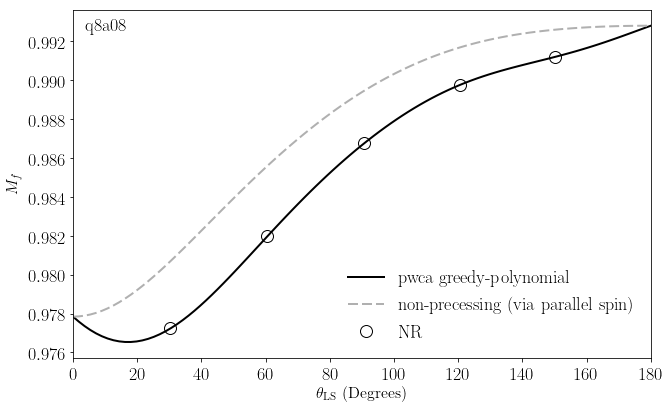

In [149]:
from phenom.utils.remnant import FinalSpinIMRPhenomD_all_in_plane_spin_on_larger_BH

a = scsearch(catalog=pwca_catalog,keyword='q8a08t150')[0]
k = [ z.split('.')[0] for z in pwca.metadata_dict['simname'] ].index(a.simname.split('.')[0])
model_theta_,m1_,m2_,eta_,delta_,chi_eff_,chi_p_,chi1_,chi2_,a1_,a2_ = pwca.metadata_dict['array_data'][k]

alert(a.xf)

# Compute ringdown frequencies for DCP
theta_range = linspace(0,pi,101)
cfa_list,cfp_list = [],[]
mod_cf_list = []
af = []

#
af2 = []
af3 = []
Mf = []
MfNP,afNP = [],[]

#
for th in theta_range:
    
    #
    chi_eff, chi_p__ = parama_party( eta_,th,a1_ )
    
    #
    af_ = FinalSpinIMRPhenomD_all_in_plane_spin_on_larger_BH(m1_, m2_, chi_p__, chi_eff/m1_, 0)
    
    #
    af.append( abs(af_) )
    
    #
    Mf_,af2_,af3_,MfNP_,afNP_ = pwca_remnant(th, eta_, a1_)
    
    af2.append( af2_ )
    af3.append( af3_ )
    Mf.append(Mf_)
    MfNP.append(MfNP_)
    afNP.append(afNP_)
    
    # #
    # cfa_,cfp_ = pwca_rdcf( th, eta_, a1_, chi1_, chi2_, chi_p__, alpha5_scale=True )
    # cfa_list.append(cfa_),cfp_list.append(cfp_)
    # 
    # #
    # mod_cf_,_ = pwca_rdcf( th, eta_, a1_, chi1_, chi2_, chi_p__, alpha5_scale=True, mod=True )
    # mod_cf_list.append(mod_cf_)
    
#
af = array(af)
af2 = array(af2)
af3 = array(af3)
MfNP = array(MfNP)
afNP = array(afNP)

# Collect raw data points 
nrmf,nraf,nrth = [],[],[]
qkey = a.simname.split('t')[0]
for b in pwca_catalog:
    if qkey in b.simname:
        nrmf.append( b.mf )
        nraf.append( abs(b.xf) )
        nrth.append( arccos(dot(b.L,b.S)  /  ( linalg.norm(b.L) * linalg.norm(b.S) )) * 180 / pi )
mask = argsort(nrth)
nrth,nrmf,nraf = [ array(z)[mask] for z in (nrth,nrmf,nraf) ]
# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- #

#
figure( figsize = 1.6*figaspect(0.618) )

#
lw=2
domain = 180*theta_range/pi
plot( domain, af,label='Pv3 (no sign)',lw=lw,ls=':',alpha=0.5)
plot( domain, -af,label='Pv3 (no sign)',lw=lw,ls=':',alpha=0.5)
plot( domain, af3,color='k',ls='-',label='pwca average',lw=lw)
# plot( domain, (af2+af3)/2,color='k',ls='-',label='pwca average',lw=lw)
plot( domain, af2,label='pwca greedy-polynomial',alpha=0.8)
plot( domain, af3,label='pwca greedy-rational',alpha=0.8)
plot( domain, afNP,color='80',label='non-precessing (via parallel spin)',lw=lw,ls='--')
plot( nrth, nraf, marker='o', color='k', ls='none', mfc='none',ms=12,label='NR' )

#
# axhline(a.xf)
# axvline(150)
# axvline(90,color='k',lw=3, alpha=0.15,zorder=-20)
# axhline(0,color='k',lw=3, alpha=0.15,zorder=-20)

#
xlim(lim(domain))
xlabel(r'$\theta_{\mathrm{LS}}$ (Degrees)')
ylabel(r'$a_f$')
#xlim(110,130)
legend()

title(a.simname.split('t')[0])

#
figure( figsize = 1.6*figaspect(0.618) )
plot( domain, Mf,label='pwca greedy-polynomial',lw=lw,color='k')
plot( domain, MfNP,label='non-precessing (via parallel spin)',lw=lw,ls='--',color='80')
plot( nrth, nrmf, marker='o', color='k', ls='none', mfc='none',ms=12,label='NR' )

#
ylabel('$M_f$')
legend(loc=4)
xlabel(r'$\theta_{\mathrm{LS}}$ (Degrees)')
xlim(lim(domain))

text_pad_frac = 0.02
text( min(xlim())+text_pad_frac*diff(xlim()), max(ylim())-text_pad_frac*diff(ylim()), a.simname.split('t')[0], size=18, va='top' )



In [14]:
from pwca import final_mass_polynomial_rho_function
?final_mass_polynomial_rho_function.final_spin_rational_sigma_function

Signature: final_mass_polynomial_rho_function.final_spin_rational_sigma_function(u, eta, delta, a1)
Docstring: <no docstring>
File:      ~/KOALA/puck/ll/pwca/final_mass_polynomial_rho_function.py
Type:      function


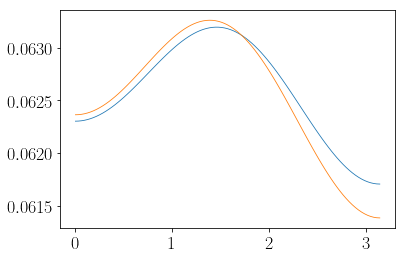

In [97]:

#
a = scsearch(catalog=pwca_catalog,keyword='q8a04t150')[0]
k = [ z.split('.')[0] for z in pwca.metadata_dict['simname'] ].index(a.simname.split('.')[0])
model_theta_,m1_,m2_,eta_,delta_,chi_eff_,chi_p_,chi1_,chi2_,a1_,a2_ = pwca.metadata_dict['array_data'][k]

# Compute ringdown frequencies for DCP
theta_range = linspace(0,pi,101)
cfa_list,cfp_list = [],[]
for th in theta_range:
    cfa_,cfp_ = pwca_rdcf( th, eta_, a1_, chi1_, chi2_, chi_p_, alpha5_scale=False )
    cfa_list.append(cfa_),cfp_list.append(cfp_)
    
#
cfa = array(cfa_list)
cfp = array(cfp_list)

plot( theta_range, cfa.real )
plot( theta_range, cfp.real )

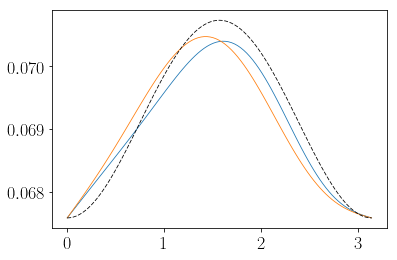

In [148]:
#
a = scsearch(catalog=pwca_catalog,keyword='q4a04t150')[0]
k = [ z.split('.')[0] for z in pwca.metadata_dict['simname'] ].index(a.simname.split('.')[0])
model_theta_,m1_,m2_,eta_,delta_,chi_eff_,chi_p_,chi1_,chi2_,a1_,a2_ = pwca.metadata_dict['array_data'][k]

# Compute ringdown frequencies for DCP
theta_range = linspace(0,pi,101)
cfa_list,cfp_list = [],[]
mod_cf_list = []
for th in theta_range:
    
    #
    chi_eff_, chi_p_ = parama_party( eta_,th,a1_ )
    
    #
    cfa_,cfp_ = pwca_rdcf( th, eta_, a1_, chi1_, chi2_, chi_p_, alpha5_scale=False )
    cfa_list.append(cfa_),cfp_list.append(cfp_)
    #
    mod_cf_,_ = pwca_rdcf( th, eta_, a1_, chi1_, chi2_, chi_p_, alpha5_scale=False, mod=True )
    mod_cf_list.append(mod_cf_)
    
#
cfa,cfp,mod_cf = [ array(k) for k in (cfa_list,cfp_list,mod_cf_list) ]

#
plot( theta_range, cfa.real )
plot( theta_range, cfp.real )
plot( theta_range, mod_cf.real, ls='--', color='k' )

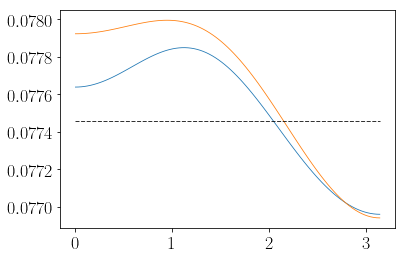

In [104]:
#
a = scsearch(catalog=pwca_catalog,keyword='q2a04t150')[0]
k = [ z.split('.')[0] for z in pwca.metadata_dict['simname'] ].index(a.simname.split('.')[0])
model_theta_,m1_,m2_,eta_,delta_,chi_eff_,chi_p_,chi1_,chi2_,a1_,a2_ = pwca.metadata_dict['array_data'][k]

# Compute ringdown frequencies for DCP
theta_range = linspace(0,pi,101)
cfa_list,cfp_list = [],[]
mod_cf_list = []
for th in theta_range:
    #
    cfa_,cfp_ = pwca_rdcf( th, eta_, a1_, chi1_, chi2_, chi_p_, alpha5_scale=False )
    cfa_list.append(cfa_),cfp_list.append(cfp_)
    #
    mod_cf_,_ = pwca_rdcf( th, eta_, a1_, chi1_, chi2_, chi_p_, alpha5_scale=False, mod=True )
    mod_cf_list.append(mod_cf_)
    
#
cfa,cfp,mod_cf = [ array(k) for k in (cfa_list,cfp_list,mod_cf_list) ]

#
plot( theta_range, cfa.real )
plot( theta_range, cfp.real )
plot( theta_range, mod_cf.real, ls='--', color='k' )

In [103]:
scsearch(catalog=pwca_catalog,keyword='t150',verbose=True)

(scsearch)>> Found catalog (=[<nrutils.core.nrsc.scentry instance at 0x121e06820>
 <nrutils.core.nrsc.scentry instance at 0x121eb70a0>
 <nrutils.core.nrsc.scentry instance at 0x121e37dc0>
 <nrutils.core.nrsc.scentry instance at 0x121e20af0>
 <nrutils.core.nrsc.scentry instance at 0x1216310a0>
 <nrutils.core.nrsc.scentry instance at 0x120bf9a50>
 <nrutils.core.nrsc.scentry instance at 0x120c10cd0>
 <nrutils.core.nrsc.scentry instance at 0x120c2af50>
 <nrutils.core.nrsc.scentry instance at 0x121c25550>
 <nrutils.core.nrsc.scentry instance at 0x121c0d280>
 <nrutils.core.nrsc.scentry instance at 0x122155690>
 <nrutils.core.nrsc.scentry instance at 0x121649370>
 <nrutils.core.nrsc.scentry instance at 0x1216636e0>
 <nrutils.core.nrsc.scentry instance at 0x12216da00>
 <nrutils.core.nrsc.scentry instance at 0x120cd9a00>
 <nrutils.core.nrsc.scentry instance at 0x120cb9d70>
 <nrutils.core.nrsc.scentry instance at 0x120b6ffa0>
 <nrutils.core.nrsc.scentry instance at 0x120b55280>
 <nrutils.core.nr

[<nrutils.core.nrsc.scentry instance at 0x120e7a550>,
 <nrutils.core.nrsc.scentry instance at 0x1211c4960>,
 <nrutils.core.nrsc.scentry instance at 0x12133e3c0>,
 <nrutils.core.nrsc.scentry instance at 0x1213566e0>,
 <nrutils.core.nrsc.scentry instance at 0x1216636e0>,
 <nrutils.core.nrsc.scentry instance at 0x120c10cd0>,
 <nrutils.core.nrsc.scentry instance at 0x121c25550>]

In [92]:
from nrutils import scsearch, gwylm

## Put NR frequencies (TD or FD) into PN Amplitude formuas!